In [74]:
import pandas as pd
import numpy as np
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Problem 1

Given the AR(1)-GARCH(1,1) model:

$r_t = \mu + \phi_1 r_{t-1} + a_t$ where $a_t = \sigma_t \epsilon_t$

$\sigma_t^2 = \alpha_0 + \alpha_1 a_{t-1}^2 + \beta_1 \sigma_{t-1}^2$

$ \epsilon_t \sim N(0,1)$

Then the return $r_t$ is normal distribution with mean $\mu + \phi_1 r_{t-1} $ and variance $\sigma_t^2$. So $r_t|F_{t-1} \sim N(\mu + \phi_1 r_{t-1})$

So the conditional probability density function of $r_t$ given $F_{t-1}$ is 

$$ f(r_t|\theta, r_1, ... , r_{t-1}) = \frac 1 {\sqrt{2\pi \sigma_t^2}} \exp (-\frac{(r_t - (\mu + \phi_1 r_{t-1}))^2} {2\sigma_t^2})$$

Then 

$$\log L(\theta | r_1 , ... , r_n) = \sum_{t=2}^n \log f(r_t | \theta , r_1, ... , r_{t-1}) = \sum_{t-2}^n [-\frac 1 2 \log (2\pi \sigma_t^2) - -\frac{(r_t - (\mu + \phi_1 r_{t-1}))^2} {2\sigma_t^2}] $$

# Problem 2

In [75]:
data = pd.read_csv('m-3m4608.csv')

data.head()

,date,rtn
0,1946-02-28,-0.077922
1,1946-03-30,0.018592
2,1946-04-30,-0.100000
3,1946-05-31,0.209877
4,1946-06-28,0.005128


In [76]:
data['log_rtn'] = np.log(data['rtn'] + 1)

data.head()

,date,rtn,log_rtn
0,1946-02-28,-0.077922,-0.081125
1,1946-03-30,0.018592,0.018421
2,1946-04-30,-0.100000,-0.105361
3,1946-05-31,0.209877,0.190519
4,1946-06-28,0.005128,0.005115


## a)

Is there any evidence of ARCH effects in the log returns? Use Ljung–Box statistics with 6 and 12 lags of autocorrelations and 5% signiﬁcance level to answer the question. 

In [77]:
log_rtn_squared = data['log_rtn']**2


lb_test_6 = acorr_ljungbox(log_rtn_squared, lags=[6], return_df=True)
lb_test_12 = acorr_ljungbox(log_rtn_squared, lags=[12], return_df=True)
lb_test_6, lb_test_12

(     lb_stat  lb_pvalue
 6  24.446801   0.000432,
       lb_stat  lb_pvalue
 12  32.663667   0.001092)

<Figure size 864x360 with 0 Axes>

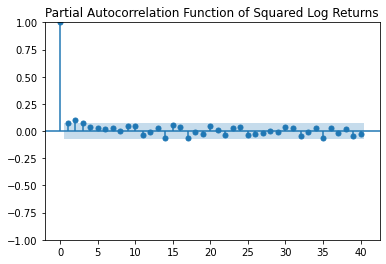

In [78]:
plt.figure(figsize=(12, 5))
plot_pacf(log_rtn_squared, lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function of Squared Log Returns')
plt.show()

## b)

Use the PACF of the squared log returns to identify an ARCH model. What is the ﬁtted model? 

첫번째에서만 유의함-> ARCH(1)

In [79]:
log_returns = data['log_rtn'].iloc[:755]
model_arch = arch_model(log_returns, mean='Zero', vol='ARCH', p=1)
fitted_arch = model_arch.fit(disp='off')

fitted_arch.summary()

c:\Users\asaf0\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004055. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                log_rtn   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                1001.70
Distribution:                  Normal   AIC:                          -1999.39
Method:            Maximum Likelihood   BIC:                          -1990.14
                                        No. Observations:                  755
Date:                Sun, Mar 03 2024   Df Residuals:                      755
Time:                        00:02:52   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.7589e-03  3.272e-04     11.486  1.546e-30 [3.117e-03,4.400e-03]
alpha[1]       0.0983  5.471e-02      1.797  7.239e-02  [-8.934e-03,  0.206]
============================================================================

Covariance estimator: robust
"""

## c)

In [80]:
log_returns_750 = data['log_rtn'].iloc[:750]


model = arch_model(log_returns_750, mean='Zero', vol='ARCH', p=1)
fitted_model = model.fit(disp='off')  

forecasts = fitted_model.forecast(horizon=5, start=749)
predicted_variances = forecasts.variance.iloc[-1]
predicted_variances

c:\Users\asaf0\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004034. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


h.1    0.003756
h.2    0.004112
h.3    0.004147
h.4    0.004150
h.5    0.004151
Name: 749, dtype: float64

## d)

Build an ARCH-M model for the log return series of 3M stock using the first 750 observations. Test the hypothesis that the risk premium is zero at the 5% signiﬁcance level. 

ARCH-M 모델 설계에 실패했습니다..

## e)


In [81]:
model_egarch = arch_model(log_returns_750, mean='Zero', vol='EGARCH', p=1, q=1)
fitted_egarch = model_egarch.fit(disp='off')
print(fitted_egarch.summary())

forecasts = fitted_egarch.forecast(horizon=1, start=749)
print(forecasts.variance.iloc[-1]) 


                       Zero Mean - EGARCH Model Results                       
Dep. Variable:                log_rtn   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                     EGARCH   Log-Likelihood:                1005.49
Distribution:                  Normal   AIC:                          -2004.98
Method:            Maximum Likelihood   BIC:                          -1991.12
                                        No. Observations:                  750
Date:                Sun, Mar 03 2024   Df Residuals:                      750
Time:                        00:02:52   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         -0.7227      0.417     -1.732  8.326e-02 [ -1.540,

c:\Users\asaf0\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004034. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Problem 3

## a) 

Compute the bid-ask spread as a function of the order size $y_t$ when the dealer has a long initial position ($z_t>0$).

$P_{ask} = P_0 + k(y_t + z_t)$ where $P_0$ is the base price without inventory increases risk. 

The bid price can be modeled as $P_{bid} = P_0 - k(y_t - z_t)$

So the bid-ask spread (S)

$$ S = 2k(y_t + z_t)$$

## b) 

Compute the bid-ask spread as a function of the order size $y_t$ when the dealer has a short initial position ($z_t<0$).

$$ S = 2k(y_t - z_t)$$

## c)

Represent these two cases graphically (plot price on the vertical axis and order size y_t on the horizontal axis).

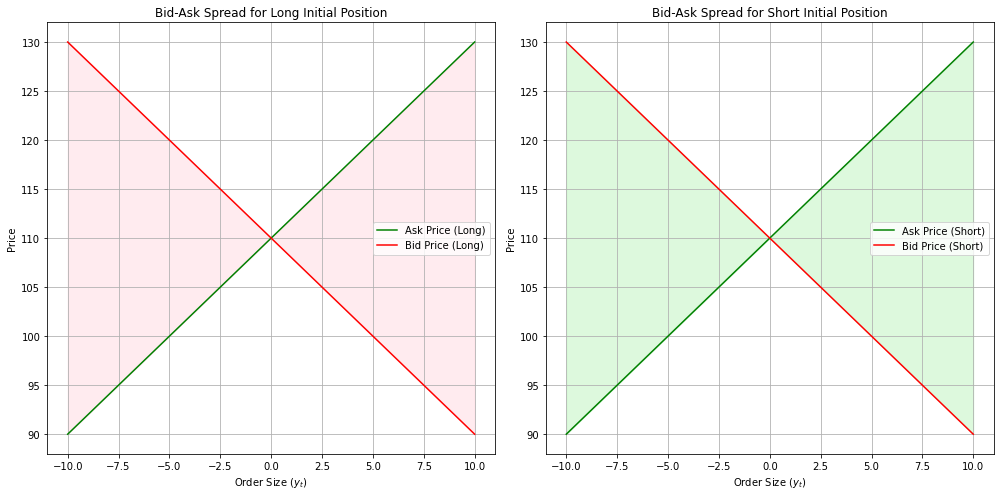

In [82]:
P0 = 100 
k = 2  
yt = np.linspace(-10, 10, 100)  # ordersize
zt_long = 5 
zt_short = -5  


ask_long = P0 + k * (yt + zt_long)
bid_long = P0 - k * (yt - zt_long)
ask_short = P0 + k * (yt - zt_short)
bid_short = P0 - k * (yt + zt_short)


plt.figure(figsize=[14,7])

# Long initial position
plt.subplot(1, 2, 1)
plt.plot(yt, ask_long, label='Ask Price (Long)', color='green')
plt.plot(yt, bid_long, label='Bid Price (Long)', color='red')
plt.fill_between(yt, bid_long, ask_long, color='pink', alpha=0.3)
plt.title('Bid-Ask Spread for Long Initial Position')
plt.xlabel('Order Size ($y_t$)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Short initial position
plt.subplot(1, 2, 2)
plt.plot(yt, ask_short, label='Ask Price (Short)', color='green')
plt.plot(yt, bid_short, label='Bid Price (Short)', color='red')
plt.fill_between(yt, bid_short, ask_short, color='lightgreen', alpha=0.3)
plt.title('Bid-Ask Spread for Short Initial Position')
plt.xlabel('Order Size ($y_t$)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Problem 4

## a)

In [83]:
data = pd.read_excel('Ch3_ex12_data.xlsx')

data.head()

,ticker,pb,pa,p,vo,vp,ibnosh,gics,bas100,ami100,mktcap,ret,vola
0,AACC,6.376667,6.400000,6.393333,60.100000,3.831219e+02,30.573,40,0.368915,0.138675,195.463378,0.012650,0.058134
1,AAME,0.500333,0.644567,0.576556,5.333333,2.940111e+00,21.903,40,24.404827,2.314466,12.628297,0.038419,0.223454
2,AAPL,116.898750,116.975000,116.970000,18880.875000,2.199989e+06,890.554,20,0.065185,0.000100,104168.087500,0.007268,0.028199
3,AATI,4.091111,4.111111,4.108889,263.977778,1.105406e+03,42.891,20,0.491540,0.017150,176.234344,0.022492,0.036442
4,AAWW,20.101111,20.142222,20.133333,282.211111,5.661318e+03,21.062,20,0.203990,0.020136,424.048278,0.022644,0.062385


In [84]:
correlation_matrix = data.corr()

correlation_matrix

C:\Users\asaf0\AppData\Local\Temp/ipykernel_26276/3855999375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,pb,pa,p,vo,vp,ibnosh,gics,bas100,ami100,mktcap,ret,vola
pb,1.000000,0.999950,0.999980,0.088010,0.514864,0.060270,0.050477,-0.212626,-0.091198,0.394920,-0.076843,-0.251373
pa,0.999950,1.000000,0.999985,0.087198,0.514183,0.059602,0.052111,-0.207120,-0.085705,0.394312,-0.077423,-0.250665
p,0.999980,0.999985,1.000000,0.087586,0.514515,0.059918,0.051325,-0.209886,-0.088315,0.394619,-0.076570,-0.251128
vo,0.088010,0.087198,0.087586,1.000000,0.653960,0.839907,-0.046191,-0.097500,-0.064142,0.707313,0.025179,-0.001881
vp,0.514864,0.514183,0.514515,0.653960,1.000000,0.629080,-0.029782,-0.087239,-0.050678,0.896987,-0.016761,-0.079091
ibnosh,0.060270,0.059602,0.059918,0.839907,0.629080,1.000000,-0.014427,-0.073091,-0.051394,0.850734,-0.014149,-0.055792
gics,0.050477,0.052111,0.051325,-0.046191,-0.029782,-0.014427,1.000000,0.077719,0.121078,0.000536,-0.031490,-0.073381
bas100,-0.212626,-0.207120,-0.209886,-0.097500,-0.087239,-0.073091,0.077719,1.000000,0.596386,-0.078354,-0.077139,0.338750
ami100,-0.091198,-0.085705,-0.088315,-0.064142,-0.050678,-0.051394,0.121078,0.596386,1.000000,-0.045100,0.054569,0.167562
mktcap,0.394920,0.394312,0.394619,0.707313,0.896987,0.850734,0.000536,-0.078354,-0.045100,1.000000,-0.036421,-0.098301


In [85]:
import statsmodels.api as sm
X1 = sm.add_constant(data[['vola', 'pb']])  
y = data['bas100']


model1 = sm.OLS(y, X1).fit()


model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bas100   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     85.61
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.45e-35
Time:                        00:02:52   Log-Likelihood:                -2949.1
No. Observations:                1128   AIC:                             5904.
Df Residuals:                    1125   BIC:                             5919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3441      0.222      1.552      0.121      -0.091       0.779
vola          37.0963      3.496     10.613      0.000      30.238      43.955
pb            -0.0266      0.006     -4.742      0.000      -0.038      -0.016
==============================================================================
Omnibus:                     1029.446   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38239.628
Skew:                           4.179   Prob(JB):                         0.00
Kurtosis:                      30.272   Cond. No.                         766.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X2 = sm.add_constant(data[['vola', 'pb']])
y = data['ami100'] 

model1 = sm.OLS(y, X2).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ami100   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     17.78
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.49e-08
Time:                        00:02:52   Log-Likelihood:                -1902.4
No. Observations:                1128   AIC:                             3811.
Df Residuals:                    1125   BIC:                             3826.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.088      0.851      0.395      -0.097       0.247
vola           7.0355      1.382      5.091      0.000       4.324       9.747
pb            -0.0038      0.002     -1.727      0.084      -0.008       0.001
==============================================================================
Omnibus:                     1580.952   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           343308.881
Skew:                           7.874   Prob(JB):                         0.00
Kurtosis:                      87.003   Cond. No.                         766.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

In [87]:

data['log_mktcap'] = np.log(data['mktcap'])
data['log_vp'] = np.log(data['vp'])
data['turnover_rate'] = data['vp'] / data['p'] 


X2 = sm.add_constant(data[['vola', 'vp']])
X3 = sm.add_constant(data[['vola', 'log_mktcap']])
X4 = sm.add_constant(data[['vola', 'log_vp']])
X5 = sm.add_constant(data[['vola', 'turnover_rate']])
X6 = sm.add_constant(data[['vola', 'turnover_rate', 'log_mktcap']]) 

model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
model4 = sm.OLS(y, X4).fit()
model5 = sm.OLS(y, X5).fit()
model6 = sm.OLS(y, X6).fit()

model_summaries = {
    'Market Cap and Volatility': model1.summary(),
    'Trading Volume and Volatility': model2.summary(),
    'Log Market Cap and Volatility': model3.summary(),
    'Log Trading Volume and Volatility': model4.summary(),
    'Turnover Rate and Volatility': model5.summary(),
    'Turnover Rate, Log Market Cap, and Volatility': model6.summary()
}

r_squared_values = {
    'Market Cap and Volatility': model1.rsquared,
    'Trading Volume and Volatility': model2.rsquared,
    'Log Market Cap and Volatility': model3.rsquared,
    'Log Trading Volume and Volatility': model4.rsquared,
    'Turnover Rate and Volatility': model5.rsquared,
    'Turnover Rate, Log Market Cap, and Volatility': model6.rsquared
}

trading_volume_coefficient = model2.params['vp']

r_squared_values, trading_volume_coefficient


({'Market Cap and Volatility': 0.03064805942356097,
  'Trading Volume and Volatility': 0.029486520446138864,
  'Log Market Cap and Volatility': 0.09781163102167856,
  'Log Trading Volume and Volatility': 0.18119030521300716,
  'Turnover Rate and Volatility': 0.03230694073053286,
  'Turnover Rate, Log Market Cap, and Volatility': 0.10132941584952682},
 -4.7481997281287334e-07)

## c)

In [88]:

y_ami = data['ami100']


model_ami1 = sm.OLS(y_ami, X1).fit()  
model_ami2 = sm.OLS(y_ami, X2).fit()  
model_ami3 = sm.OLS(y_ami, X3).fit()  
model_ami4 = sm.OLS(y_ami, X4).fit()  
model_ami5 = sm.OLS(y_ami, X5).fit()  
model_ami6 = sm.OLS(y_ami, X6).fit()  


r_squared_values_ami = {
    'Market Cap and Volatility': model_ami1.rsquared,
    'Trading Volume and Volatility': model_ami2.rsquared,
    'Log Market Cap and Volatility': model_ami3.rsquared,
    'Log Trading Volume and Volatility': model_ami4.rsquared,
    'Turnover Rate and Volatility': model_ami5.rsquared,
    'Turnover Rate, Log Market Cap, and Volatility': model_ami6.rsquared
}

r_squared_values_ami

{'Market Cap and Volatility': 0.03064805942356097,
 'Trading Volume and Volatility': 0.029486520446138864,
 'Log Market Cap and Volatility': 0.09781163102167856,
 'Log Trading Volume and Volatility': 0.18119030521300716,
 'Turnover Rate and Volatility': 0.03230694073053286,
 'Turnover Rate, Log Market Cap, and Volatility': 0.10132941584952682}